**Porocilo**

In [105]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

df_homicides = pd.read_csv(".\\files\\USA_homicides\\USA_homicides_processed.csv")
df_guns = pd.read_csv('.\\files\\guns_per_capita.csv', header=0)
df_population = pd.read_csv(".\\files\\us_population_2019.csv")


Total number of murders for each state

Shown with a bar plot

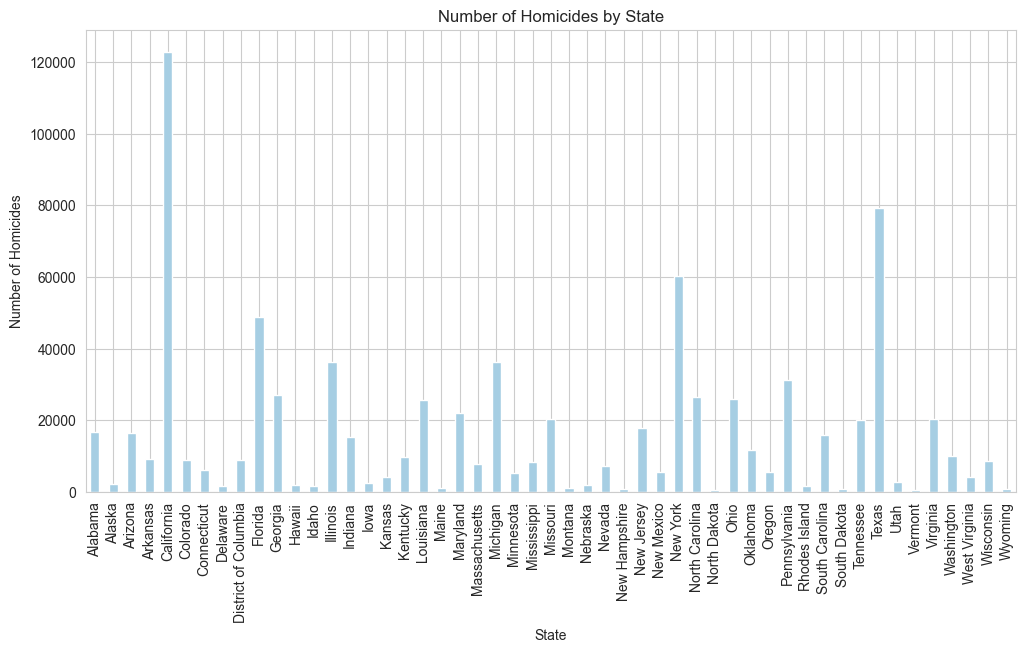

In [106]:
murders_by_state = df_homicides.groupby("State")["ID"].count()
murders_by_state.drop("PAPSP8", inplace=True)

murders_by_state.plot(kind="bar", figsize=(12,6))
plt.title("Number of Homicides by State")
plt.xlabel("State")
plt.ylabel("Number of Homicides")
plt.show()

Shown with a map of the USA states

In [107]:
murders_by_state = df_homicides.groupby("State")["ID"].count().reset_index()
murders_by_state.columns = ["State", "Murders"]

state_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhodes Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

murders_by_state['State'] = murders_by_state['State'].replace(state_abbr)

fig = px.choropleth(murders_by_state, 
                    locations='State', 
                    locationmode="USA-states", 
                    color='Murders',
                    scope="usa",
                    color_continuous_scale='Blues',
                    range_color=(0, murders_by_state['Murders'].max()),
                    title='Murders per State')

fig.show()

Total number of murders for each state per capita (100.000 people)

Shown with a bar plot

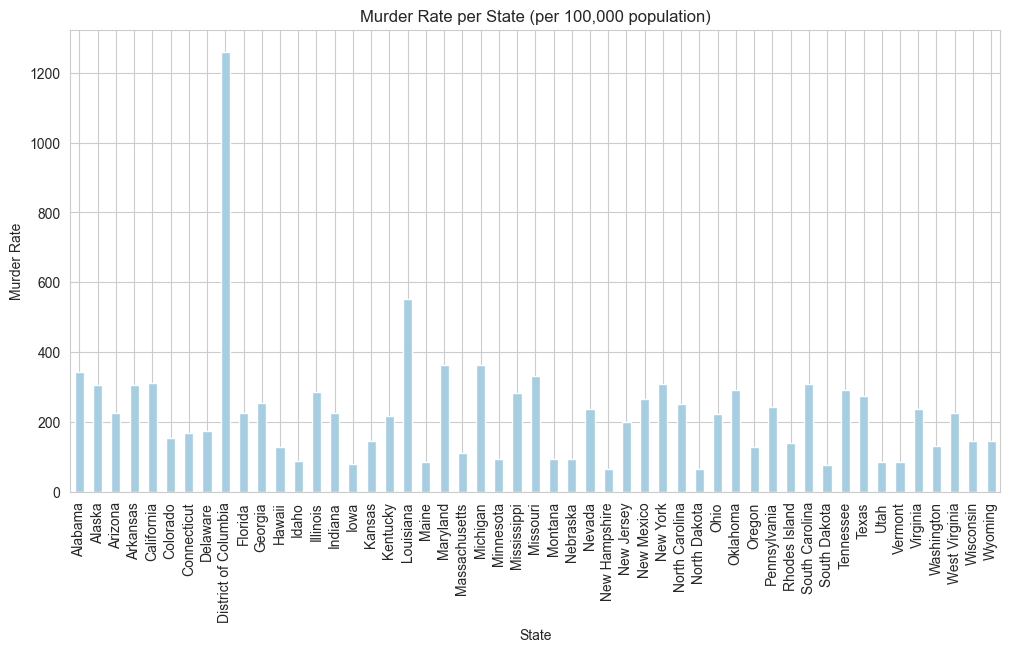

In [110]:
population_by_state = df_population.set_index("State")["Population"]

murder_rate_by_state = murders_by_state / population_by_state * 100000

plt.figure(figsize=(12,6))
murder_rate_by_state.plot(kind="bar")
plt.title("Murder Rate per State (per 100,000 population)")
plt.xlabel("State")
plt.ylabel("Murder Rate")
plt.show()

In [ ]:
Shown with a map of the USA states

In [133]:
murders_by_state = df_homicides.groupby("State")["ID"].count().reset_index()
murders_by_state.columns = ["State", "Murders"]

merged_df = pd.merge(murders_by_state, df_population, on='State')
merged_df['Murder Rate'] = merged_df['Murders'] / merged_df['Population'] * 100000

state_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

merged_df['State'] = merged_df['State'].replace(state_abbr)

# Create the choropleth map
fig = px.choropleth(merged_df, 
                    locations='State', 
                    locationmode="USA-states", 
                    color='Murder Rate',
                    scope="usa",
                    color_continuous_scale='Blues',
                    range_color=(0, merged_df['Murder Rate'].max()),
                    title='Murder Rate per State')

fig.show()

**zadaca 5**

circumstance

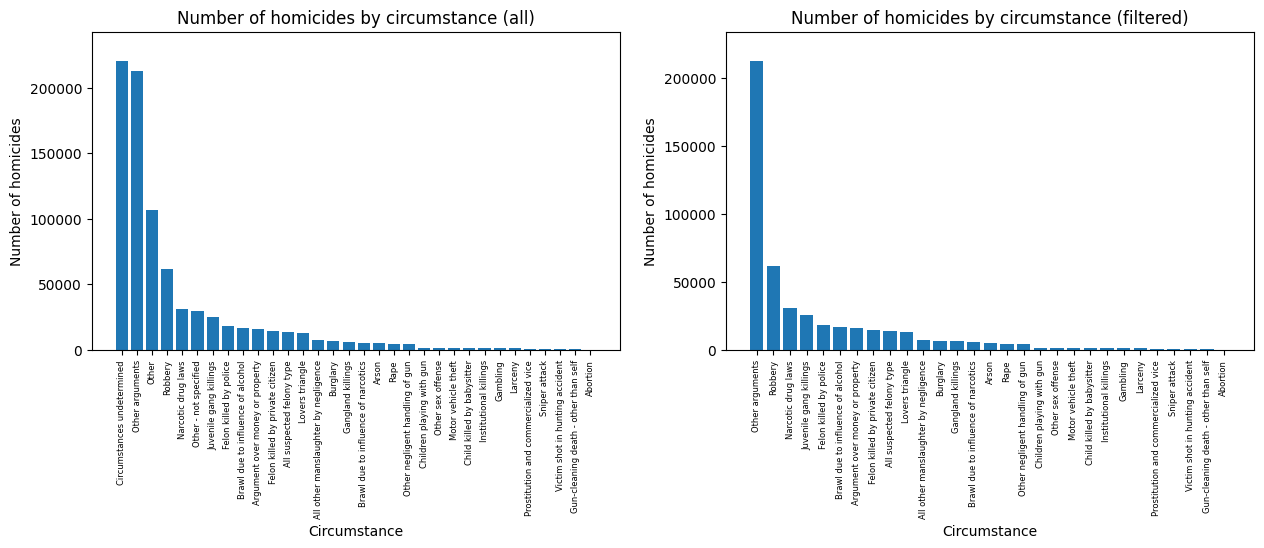

In [2]:
warnings.filterwarnings("ignore", category=UserWarning)

circumstance_counts_all = df_homicides.groupby('Circumstance')['Homicide'].count().sort_values(ascending=False)
circumstance_counts_filtered = circumstance_counts_all.drop(['Other', 'Other - not specified', 'Circumstances undetermined'])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axs[0].bar(circumstance_counts_all.index, circumstance_counts_all.values)
axs[0].set_xticklabels(circumstance_counts_all.index, rotation=90, fontsize=6)
axs[0].set_xlabel('Circumstance')
axs[0].set_ylabel('Number of homicides')
axs[0].set_title('Number of homicides by circumstance (all)')
axs[0].set_ylim([0, max(circumstance_counts_all.values) * 1.1])

axs[1].bar(circumstance_counts_filtered.index, circumstance_counts_filtered.values)
axs[1].set_xticklabels(circumstance_counts_filtered.index, rotation=90, fontsize=6)
axs[1].set_xlabel('Circumstance')
axs[1].set_ylabel('Number of homicides')
axs[1].set_title('Number of homicides by circumstance (filtered)')
axs[1].set_ylim([0, max(circumstance_counts_filtered.values) * 1.1])

plt.subplots_adjust(bottom=0.35)
plt.show()

relationship

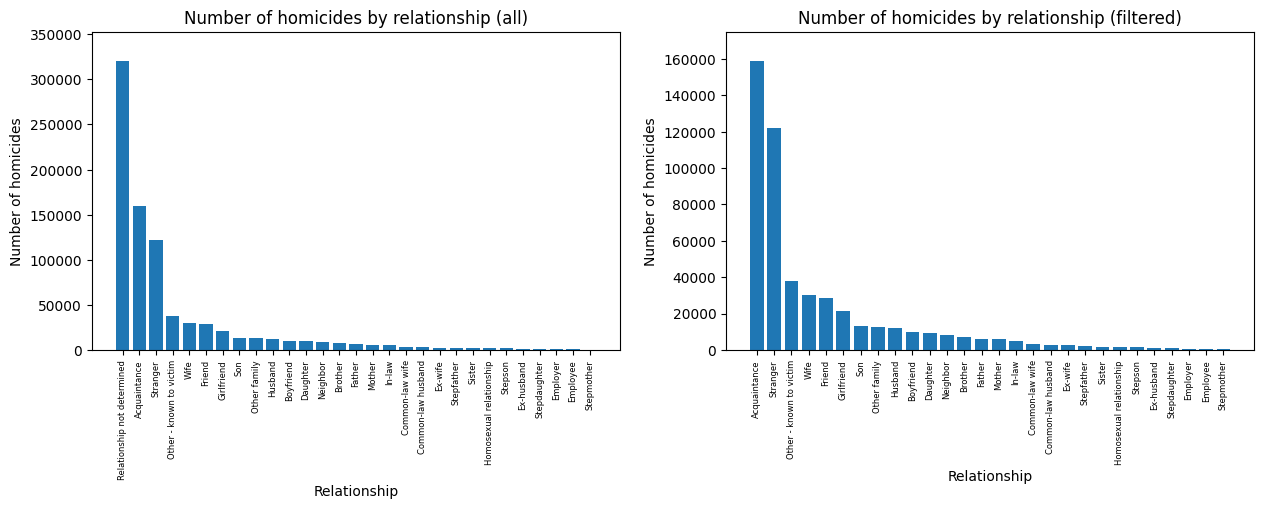

In [3]:
relationship_counts = df_homicides.groupby('Relationship')['Homicide'].count().sort_values(ascending=False)
relationship_counts_filtered = relationship_counts.drop(['Relationship not determined'])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axs[0].bar(relationship_counts.index, relationship_counts.values)
axs[0].set_xticklabels(relationship_counts.index, rotation=90, fontsize=6)
axs[0].set_xlabel('Relationship')
axs[0].set_ylabel('Number of homicides')
axs[0].set_title('Number of homicides by relationship (all)')
axs[0].set_ylim([0, max(relationship_counts.values) * 1.1])

axs[1].bar(relationship_counts_filtered.index, relationship_counts_filtered.values)
axs[1].set_xticklabels(relationship_counts_filtered.index, rotation=90, fontsize=6)
axs[1].set_xlabel('Relationship')
axs[1].set_ylabel('Number of homicides')
axs[1].set_title('Number of homicides by relationship (filtered)')
axs[1].set_ylim([0, max(relationship_counts_filtered.values) * 1.1])

plt.subplots_adjust(bottom=0.35)
plt.show()

plus

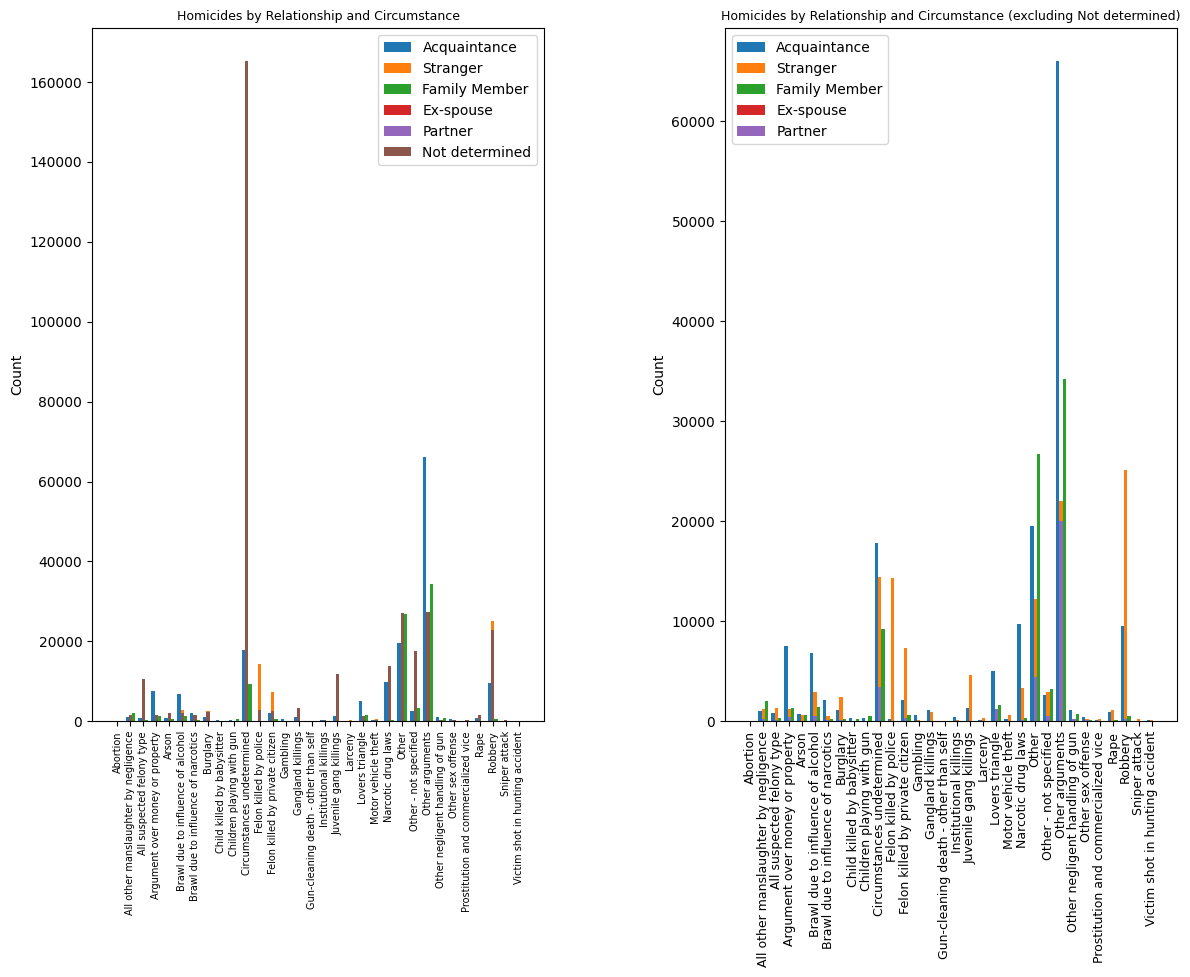

In [4]:
import numpy as np

circumstance_relationship_count = df_homicides.groupby(['Circumstance', 'Relationship'])['Relationship'].count().unstack()
circumstance_relationship_count['Family_member'] = circumstance_relationship_count[['Brother', 'Sister','Common-law husband','Common-law wife', 'Daughter', 'Other family','Son', 'Stepdaughter','Stepfather','Stepmother','Stepson','Wife']].sum(axis=1)
circumstance_relationship_count['Acquaintance'] = circumstance_relationship_count[['Acquaintance', 'Employee', 'Employer']].sum(axis=1)
circumstance_relationship_count['Ex-spouse'] = circumstance_relationship_count[['Ex-wife', 'Ex-husband']].sum(axis=1)
circumstance_relationship_count['Partner'] = circumstance_relationship_count[['Boyfriend', 'Girlfriend', 'Homosexual relationship']].sum(axis=1)

labels = circumstance_relationship_count.index
x = np.arange(len(labels))
width = 0.25

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 9))
fig.subplots_adjust(wspace=0.4)

rects1 = ax1.bar(x - width, circumstance_relationship_count['Acquaintance'], width, label='Acquaintance')
rects2 = ax1.bar(x, circumstance_relationship_count['Stranger'], width, label='Stranger')
rects3 = ax1.bar(x + width, circumstance_relationship_count['Family_member'], width, label='Family Member')
rects4 = ax1.bar(x, circumstance_relationship_count['Ex-spouse'], width, label='Ex-spouse')
rects5 = ax1.bar(x, circumstance_relationship_count['Partner'], width, label='Partner')
rects6 = ax1.bar(x, circumstance_relationship_count['Relationship not determined'], width, label='Not determined')
ax1.set_ylabel('Count')
ax1.set_title('Homicides by Relationship and Circumstance',fontsize=9)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=90,fontsize=7)
ax1.legend()

rects1 = ax2.bar(x - width, circumstance_relationship_count['Acquaintance'], width, label='Acquaintance')
rects2 = ax2.bar(x, circumstance_relationship_count['Stranger'], width, label='Stranger')
rects3 = ax2.bar(x + width, circumstance_relationship_count['Family_member'], width, label='Family Member')
rects4 = ax2.bar(x, circumstance_relationship_count['Ex-spouse'], width, label='Ex-spouse')
rects5 = ax2.bar(x, circumstance_relationship_count['Partner'], width, label='Partner')
ax2.set_ylabel('Count')
ax2.set_title('Homicides by Relationship and Circumstance (excluding Not determined)', fontsize=9)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=90,fontsize=9)
ax2.legend()

plt.show()